# Data Processing

| Property               | GOAL                                   | `sst.mnmean.nc`                     | `OISSS_L4_multimission_v2.0_1m_201201_202412.nc`   | `mld_dr003_ref10m_v2023.nc`            | `nemo00_1m_201001_202212_grid_T.nc`              | 
|------------------------|----------------------------------------|-------------------------------------|----------------------------------------------------|----------------------------------------|--------------------------------------------------|
| **Content**            | `sst, sss, mld`                        | `sst`                               | `sss`                                              | `mld`                                  | `sst/sbt, sss/sbs, mld (2x), ssh, bs`            |       
| **Resolution**         | `1.0°`                                 | `1.0°`                              | `0.25°`                                            | `1.0°`                                 | `0.5°`                                           |       
| **Mask**               | `Yes (NaN)`                            | `No`                                | `Yes (NaN)`                                        | `Yes (NaN)`                            | `Yes (NaN)`                                      |       
| **Time**               | `monthly climatology`                  | `1981-12-01 to 2023-01-01 (monthly)`| `2012-01-16 to 2024-12-15 (monthly)`               | `monthly climatology`                  | `2010-01-16 to 2022-12-16 (monthly)`             |       
| **Time format**        | `datetime64`                           | `datetime64`                        | `datetime64`                                       | `day of year`                          | `datetime64`                                     |       
| **Dimensions**         | `time`, `lat`, `lon`                   | `time`, `lat`, `lon`                | `time`, `latitude`, `longitude`                    | `time`, `lat`, `lon`                   | `time_counter`, `y`, `x`                         |       
| **Dimension lon/lat**  | `1D`                                   | `1D`                                | `1D`                                               | `1D`                                   | `2D`                                             |       
| **Name time**          | `time`                                 | `time`                              | `time`                                             | `time`                                 | `time_counter`                                   |       
| **Name lon/lat**       | `lon` / `lat`                          | `lon` / `lat`                       | `longitude` / `latitude`                           | `lon` / `lat`                          | `nav_lon` / `nav_lat`                            |       
| **Longitude range**    | `0.50° to 359.50°`  (west to east)     | `0.50° to 359.50°`  (west to east)  | `-179.875° to 179.875°` (west to east)             | `-179.50° to 179.50°` (west to east)   | `-180.00° to 180.00°` (west to east)             |      
| **Latitude range**     | `-89.50° to 89.50°` (south to north)   | `89.50° to -89.50°` (north to south)| `-89.875° to 89.875°`   (south to north)           | `-89.50° to 89.50°`   (south to north) | `-77.01° to 89.89°`   (south to north)           |       

## Imports

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regionmask
import os, contextlib
from utils.data.general import fill_coastal_points_in_time, show_coverage_mask_model

## Data

### Observations

In [2]:
obs_sst = xr.open_dataset('../obs/sst.mnmean.nc')
obs_sst

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [3]:
obs_sss = xr.open_dataset('../obs/OISSS_L4_multimission_v2.0_1m_201201_202412.nc')
obs_sss

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 156)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2012-01-16 2012-02-15 ... 2024-12-15
Data variables:
    sss        (time, latitude, longitude) float32 ...
Attributes: (12/44)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_v2_monthly
    Version:                       V2.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            180.0
    geospatial_lon_resolution:     0.25
    geospatial_lon_units:          degrees_east
    history:                       Thu Jun  5 16:29:29 2025: ncks -O -v sss O...
    NCO:                           netCDF Operators version 5.3.3 (Homepage =...

In [4]:
obs_mld = xr.open_dataset('../obs/mld_dr003_ref10m_v2023.nc')
obs_mld

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180, time: 12)
Coordinates:
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time       (time) int32 14 45 73 104 134 165 195 226 257 287 318 348
Data variables:
    mask       (lat, lon) int16 ...
    n_obs      (time, lat, lon) int32 ...
    mld_dr003  (time, lat, lon) float32 ...
Attributes:
    title:        Monthly climatology of the oceanic Mixed Layer Depth (MLD) ...
    institution:  LOPS laboratory (IFREMER, Univ. of Brest, CNRS, IRD), Brest...
    source:       This MLD climatology is generated by monthly mapping (OI/kr...
    references:   DOI of this dataset along with a description: https://doi.o...
    Timestamp:    Wed Jul 12 19:30:42 2023

### Model

In [5]:
model = xr.open_dataset('../model/nemo00_1m_201001_202212_grid_T_new.nc')
model

<xarray.Dataset>
Dimensions:            (time_counter: 156, bnds: 2, y: 510, x: 720)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 2010-01-16T12:00:00 ... ...
    nav_lon            (y, x) float32 ...
    nav_lat            (y, x) float32 ...
Dimensions without coordinates: bnds, y, x
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] ...
    tos                (time_counter, y, x) float32 ...
    sos                (time_counter, y, x) float32 ...
    zos                (time_counter, y, x) float32 ...
    mldkz5             (time_counter, y, x) float32 ...
    mldr10_1           (time_counter, y, x) float32 ...
    mldr10_3           (time_counter, y, x) float32 ...
    tob                (time_counter, y, x) float32 ...
    sob                (time_counter, y, x) float32 ...
    taubot             (time_counter, y, x) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    name:         nemo00_1d_20100101_20101231_grid_T
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2025-Jun-02 21:05:49 GMT
    uuid:         3afa7cbf-4502-4ac9-93d1-f99a1f79fc71
    history:      Mon Jun 23 16:20:02 2025: cdo -r monmean nemo00/nemo00_1d_2...
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [6]:
mesh = xr.open_dataset('../model/orca05l75_domain_cfg_nemov5_10m.nc')
mesh

<xarray.Dataset>
Dimensions:       (y: 510, x: 720, nav_lev: 75, nlines: 54)
Coordinates:
  * nav_lev       (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
Dimensions without coordinates: y, x, nlines
Data variables: (12/33)
    e1v           (y, x) float64 ...
    e2u           (y, x) float64 ...
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    glamt         (y, x) float64 ...
    glamu         (y, x) float64 ...
    ...            ...
    e3uw_0        (nav_lev, y, x) float64 ...
    e3vw_0        (nav_lev, y, x) float64 ...
    bottom_level  (y, x) int32 ...
    top_level     (y, x) int32 ...
    bathy_metry   (y, x) float64 ...
    namelist_cfg  (nlines) |S102 ...
Attributes:
    history:      Tue Sep 10 21:54:46 2024: ncap2 -O --ftn -s           /* Gi...
    CfgName:      ORCA
    CfgIndex:     5
    Iperio:       1
    Jperio:       0
    NFold:        1
    NFtype:       F
    VertCoord:    zps
    IsfCav:       0
    NEMOversion:  5.0
    NCO:          netCDF Operators version 5.2.8 (Homepage = http://nco.sf.ne...

### Processed 

In [7]:
clim = xr.open_dataset('../processed/nemo00_clim_2011_2022.nc')
clim

<xarray.Dataset>
Dimensions:            (time_counter: 12, bnds: 2, y: 510, x: 720)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 2022-01-16T12:00:00 ... ...
    nav_lon            (y, x) float32 ...
    nav_lat            (y, x) float32 ...
Dimensions without coordinates: bnds, y, x
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] ...
    tos                (time_counter, y, x) float32 ...
    sos                (time_counter, y, x) float32 ...
    zos                (time_counter, y, x) float32 ...
    mldkz5             (time_counter, y, x) float32 ...
    mldr10_1           (time_counter, y, x) float32 ...
    tob                (time_counter, y, x) float32 ...
    sob                (time_counter, y, x) float32 ...
    taubot             (time_counter, y, x) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         nemo00_1d_20100101_20101231_grid_T
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Dec-27 15:07:31 GMT
    uuid:         87d8f670-e44a-4da0-9c1a-a2d24a6b35a7
    history:      Thu Jun 19 10:47:23 2025: cdo ymonmean .tmp/nemo00_2011_202...
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

## Processing

In [8]:
target_grid = xr.Dataset({
    'lon': (['lon'], np.arange(0.5, 360, 1)),      
    'lat': (['lat'], np.arange(-89.5, 89.5 + 1))   
})

land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(target_grid)
ocean_mask = land_mask.isnull()

### Obs

#### Extracting relevant data

In [9]:
obs_sst = obs_sst["sst"].sel(time=slice("2012", "2022"))
obs_sss = obs_sss["sss"].sel(time=slice("2012", "2022"))
obs_mld = obs_mld["mld_dr003"]

#### Compute monthly climatology

In [10]:
obs_sst = obs_sst.groupby('time.month').mean(dim='time')
obs_sss = obs_sss.groupby('time.month').mean(dim='time')

#### Time dimension in months

In [11]:
day_of_year = obs_mld['time'].values  # e.g., [14, 45, ..., 348]
ref_dates = np.array(['2001-01-01'], dtype='datetime64[D]') + day_of_year.astype('timedelta64[D]')
months = xr.DataArray(ref_dates.astype('datetime64[M]').astype(int) % 12 + 1, dims='time', name='month')
obs_mld = obs_mld.assign_coords(month=months).swap_dims({'time': 'month'}).drop_vars('time')

#### Renaming

In [12]:
obs_sss = obs_sss.rename({
    'longitude': 'lon',
    'latitude': 'lat'
})

#### Regridding

In [13]:
import xesmf as xe

obs_sss = fill_coastal_points_in_time(obs_sss, 20, "month") 

with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
    regridder = xe.Regridder(
        obs_sss, target_grid,
        method='bilinear',
        filename='../weights/weights_bilinear_sss.nc',  
        reuse_weights=True,                  
        ignore_degenerate=True,
        periodic=True
    )

obs_sss = regridder(obs_sss)

#### Reordering

In [14]:
for obs in [obs_sst, obs_sss, obs_mld]:
    obs['lon'] = (obs['lon'] + 360) % 360
    obs = obs.sortby('lon') 
    obs = obs.sortby('lat')
    obs = obs.transpose('month', 'lat', 'lon')

#### Masking

In [15]:
obs_sst = obs_sst.where(ocean_mask)  
obs_sss = obs_sss.where(ocean_mask)  

#### Combining

In [16]:
obs_combined = xr.merge([
    obs_sst.to_dataset(name="sst"),
    obs_sss.to_dataset(name="sss"),
    obs_mld.to_dataset(name="mld")
])

obs_combined.coords['lon'].attrs.update({
    'long_name': 'Longitude',
    'units': 'degrees_east',
    'standard_name': 'longitude'
})

obs_combined.coords['lat'].attrs.update({
    'long_name': 'Latitude',
    'units': 'degrees_north',
    'standard_name': 'latitude'
})

obs_combined['sst'].attrs.update({
    'long_name': 'Monthly Mean of Sea Surface Temperature',
    'units': 'degC',
    'standard_name': 'sea_surface_temperature'
})

obs_combined['sss'].attrs.update({
    'long_name': 'Monthly Mean of Sea Surface Salinity',
    'units': 'psu',
    'standard_name': 'sea_surface_salinity'
})

obs_combined['mld'].attrs.update({
    'long_name': 'Monthly Mean of Mixed Layer Depth',
    'units': 'm',
    'standard_name': 'ocean_mixed_layer_thickness'
})

obs_combined

<xarray.Dataset>
Dimensions:  (lat: 180, month: 12, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    sst      (month, lat, lon) float32 nan nan nan nan ... -1.79 -1.79 -1.79
    sss      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mld      (month, lat, lon) float32 ...

#### Verifying

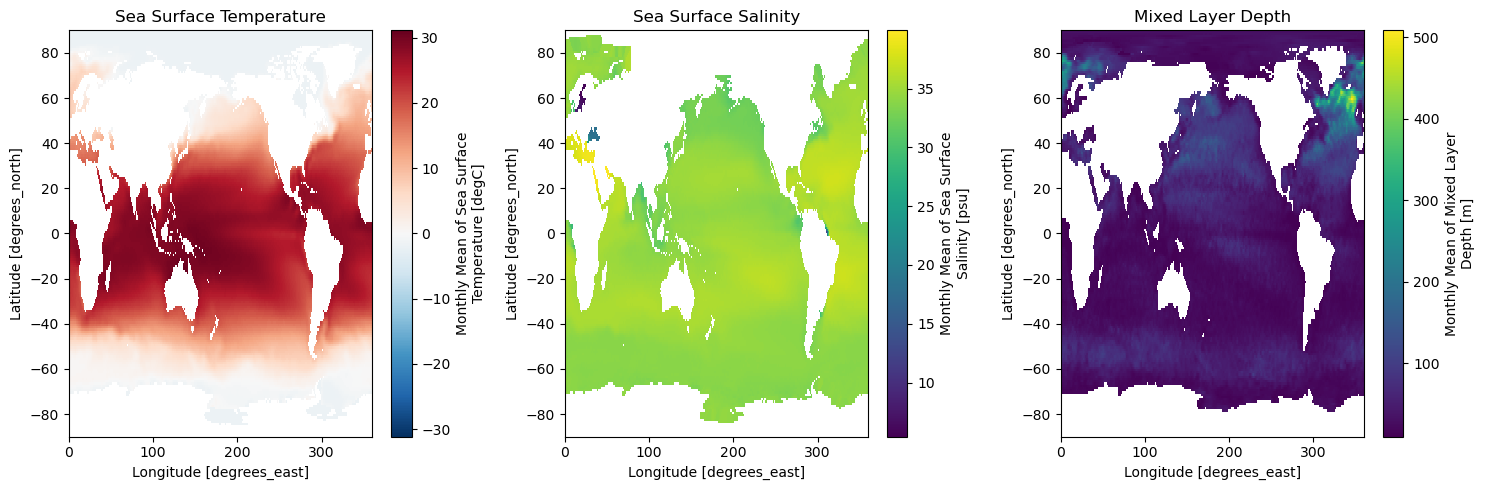

In [17]:
month_to_plot = 1

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
varnames = ['sst', 'sss', 'mld']
titles = ['Sea Surface Temperature', 'Sea Surface Salinity', 'Mixed Layer Depth']

for ax, var, title in zip(axes, varnames, titles):
    data_to_plot = obs_combined[var].sel(month=month_to_plot)
    im = data_to_plot.plot(ax=ax, add_colorbar=True)
    ax.set_title(title)
plt.tight_layout()
plt.show()

#### Saving

In [18]:
obs_combined.to_netcdf("../processed/combined_observations.nc")

### Model

#### Extracting relevant data

In [19]:
model = model[["tos", "sos", "mldr10_3"]].rename({"tos": "sst", "sos": "sss", "mldr10_3": "mld"}).sel(time_counter=slice("2012", "2022"))

#### Compute monthly climatology

In [20]:
model = model.groupby("time_counter.month").mean(dim="time_counter")

#### Renaming

In [21]:
model = model.rename({
    'nav_lon': 'lon',
    'nav_lat': 'lat',
})
model = model.assign_coords(lon=mesh['glamt'], lat=mesh['gphit'])

#### Regridding

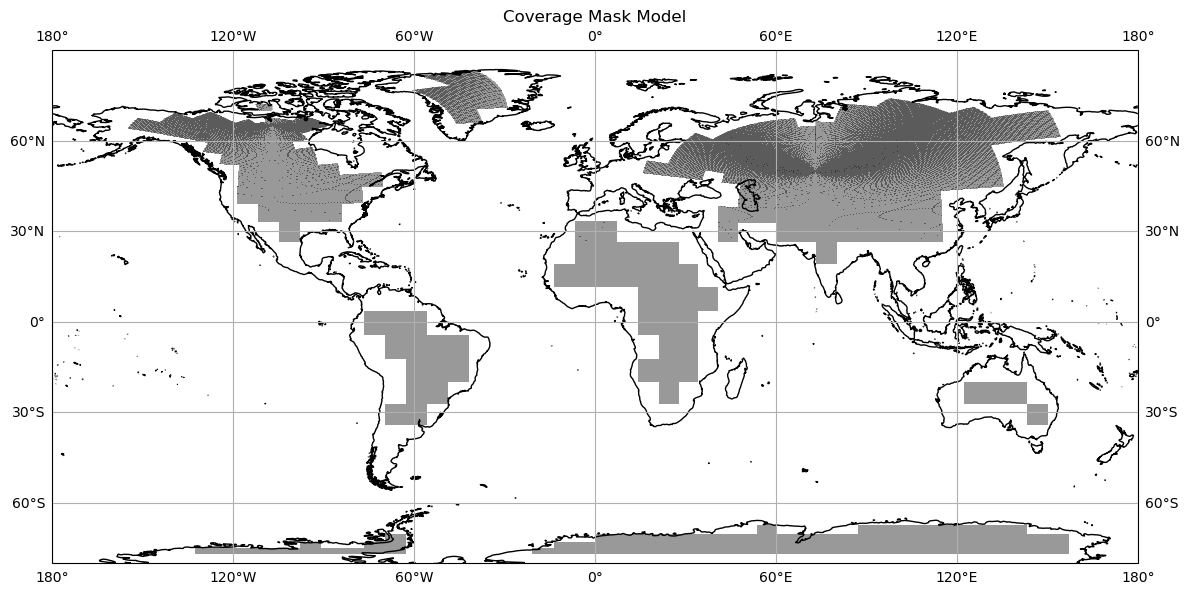

In [22]:
show_coverage_mask_model(model=model, mesh=mesh, var_name='sst', time_dim='month')

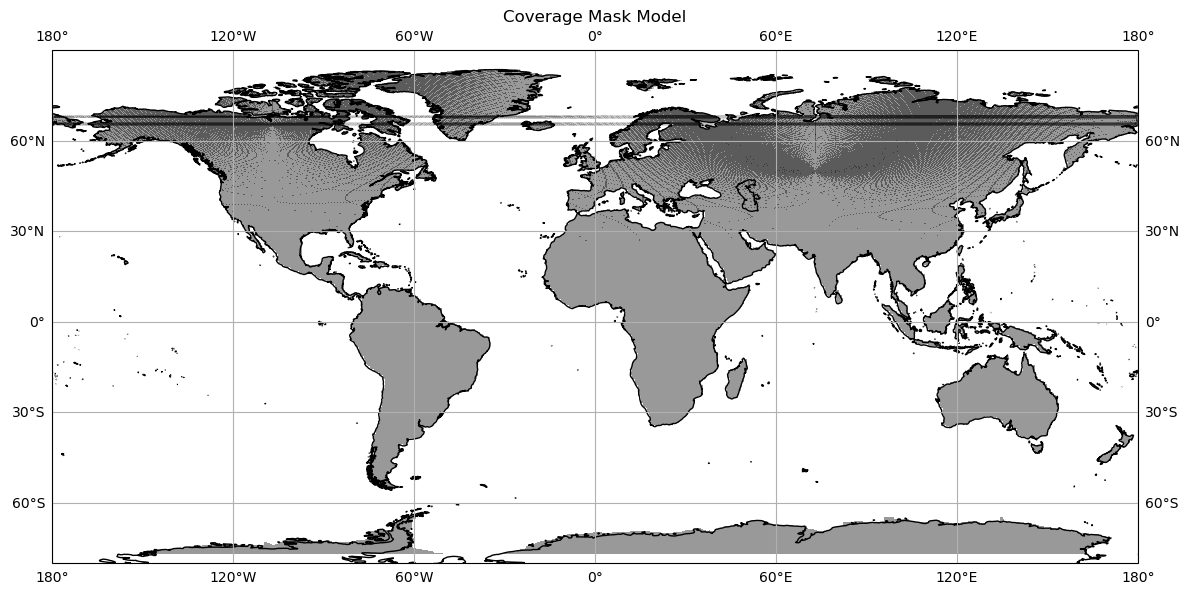

In [23]:
model_mask = mesh['bathy_metry'] == 0
model = model.where(~model_mask)
show_coverage_mask_model(model=model, mesh=mesh, var_name='sst', time_dim='month')

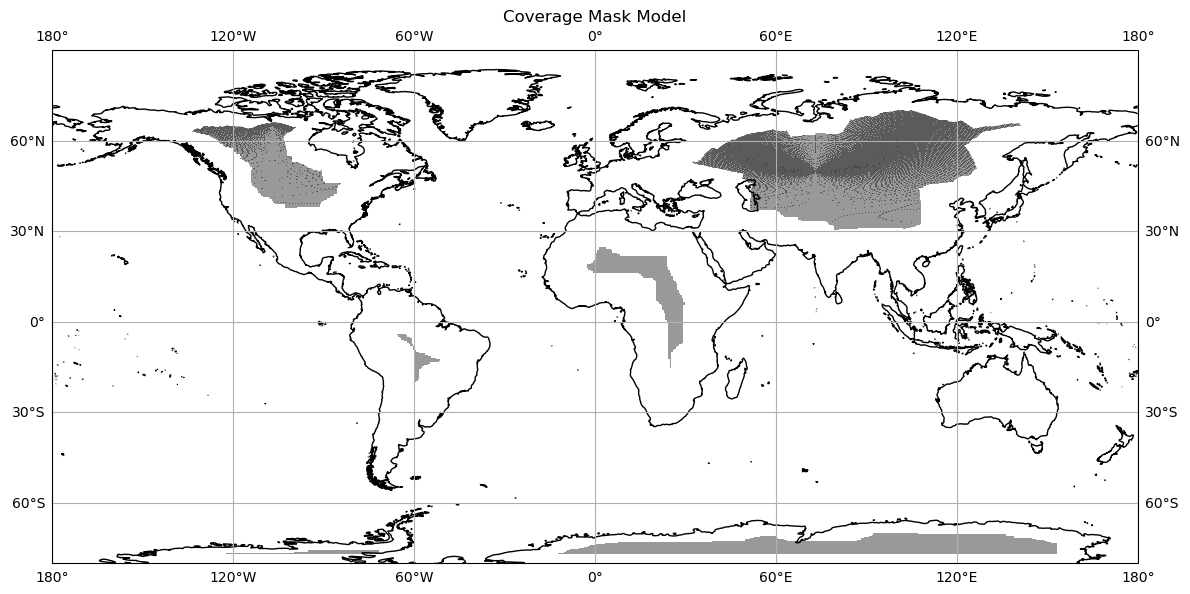

In [24]:
model = fill_coastal_points_in_time(model, 20, "month") 
show_coverage_mask_model(model=model, mesh=mesh, var_name='sst', time_dim='month')

In [25]:
with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
    regridder = xe.Regridder(
        model, target_grid,
        method='bilinear',
        filename='../weights/weights_bilinear_orca05.nc',  
        reuse_weights=True,                  
        ignore_degenerate=True,
        periodic=True
    )

model = regridder(model)

#### Reordering

In [26]:
model['lon'] = (model['lon'] + 360) % 360
model = model.sortby('lon') 
model = model.sortby('lat')
model = model.transpose('month', 'lat', 'lon')

#### Masking

In [27]:
model = model.where(ocean_mask)  

#### Combining

In [28]:
model.coords['lon'].attrs.update({
    'long_name': 'Longitude',
    'units': 'degrees_east',
    'standard_name': 'longitude'
})

model.coords['lat'].attrs.update({
    'long_name': 'Latitude',
    'units': 'degrees_north',
    'standard_name': 'latitude'
})

# Variable attributes (applies to each variable)
model['sst'].attrs.update({
    'long_name': 'Monthly Mean of Sea Surface Temperature',
    'units': 'degC',
    'standard_name': 'sea_surface_temperature'
})

model['sss'].attrs.update({
    'long_name': 'Monthly Mean of Sea Surface Salinity',
    'units': 'psu',
    'standard_name': 'sea_surface_salinity'
})

model['mld'].attrs.update({
    'long_name': 'Monthly Mean of Mixed Layer Depth',
    'units': 'm',
    'standard_name': 'ocean_mixed_layer_thickness'
})

model

<xarray.Dataset>
Dimensions:  (month: 12, lat: 180, lon: 360)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    sst      (month, lat, lon) float32 nan nan nan nan ... -1.773 -1.773 -1.773
    sss      (month, lat, lon) float32 nan nan nan nan ... 32.75 32.75 32.76
    mld      (month, lat, lon) float32 nan nan nan nan ... 42.84 42.85 42.87
Attributes:
    regrid_method:  bilinear

#### Verifying

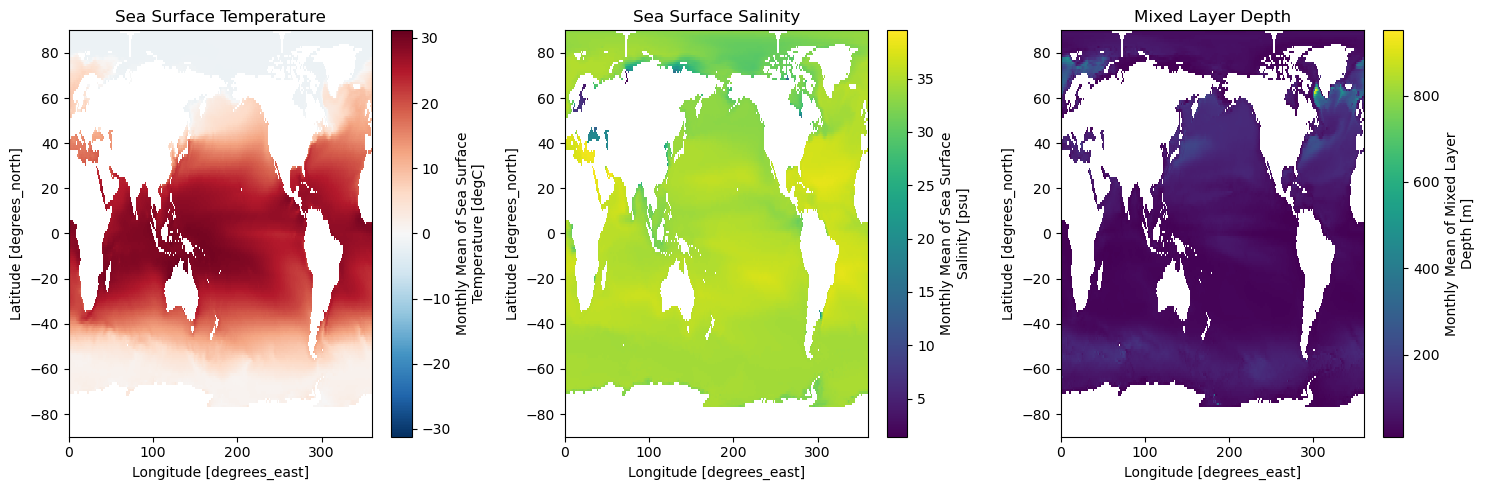

In [29]:
month_to_plot = 1

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
varnames = ['sst', 'sss', 'mld']
titles = ['Sea Surface Temperature', 'Sea Surface Salinity', 'Mixed Layer Depth']

for ax, var, title in zip(axes, varnames, titles):
    data_to_plot = model[var].sel(month=month_to_plot)
    im = data_to_plot.plot(ax=ax, add_colorbar=True)
    ax.set_title(title)
plt.tight_layout()
plt.show()

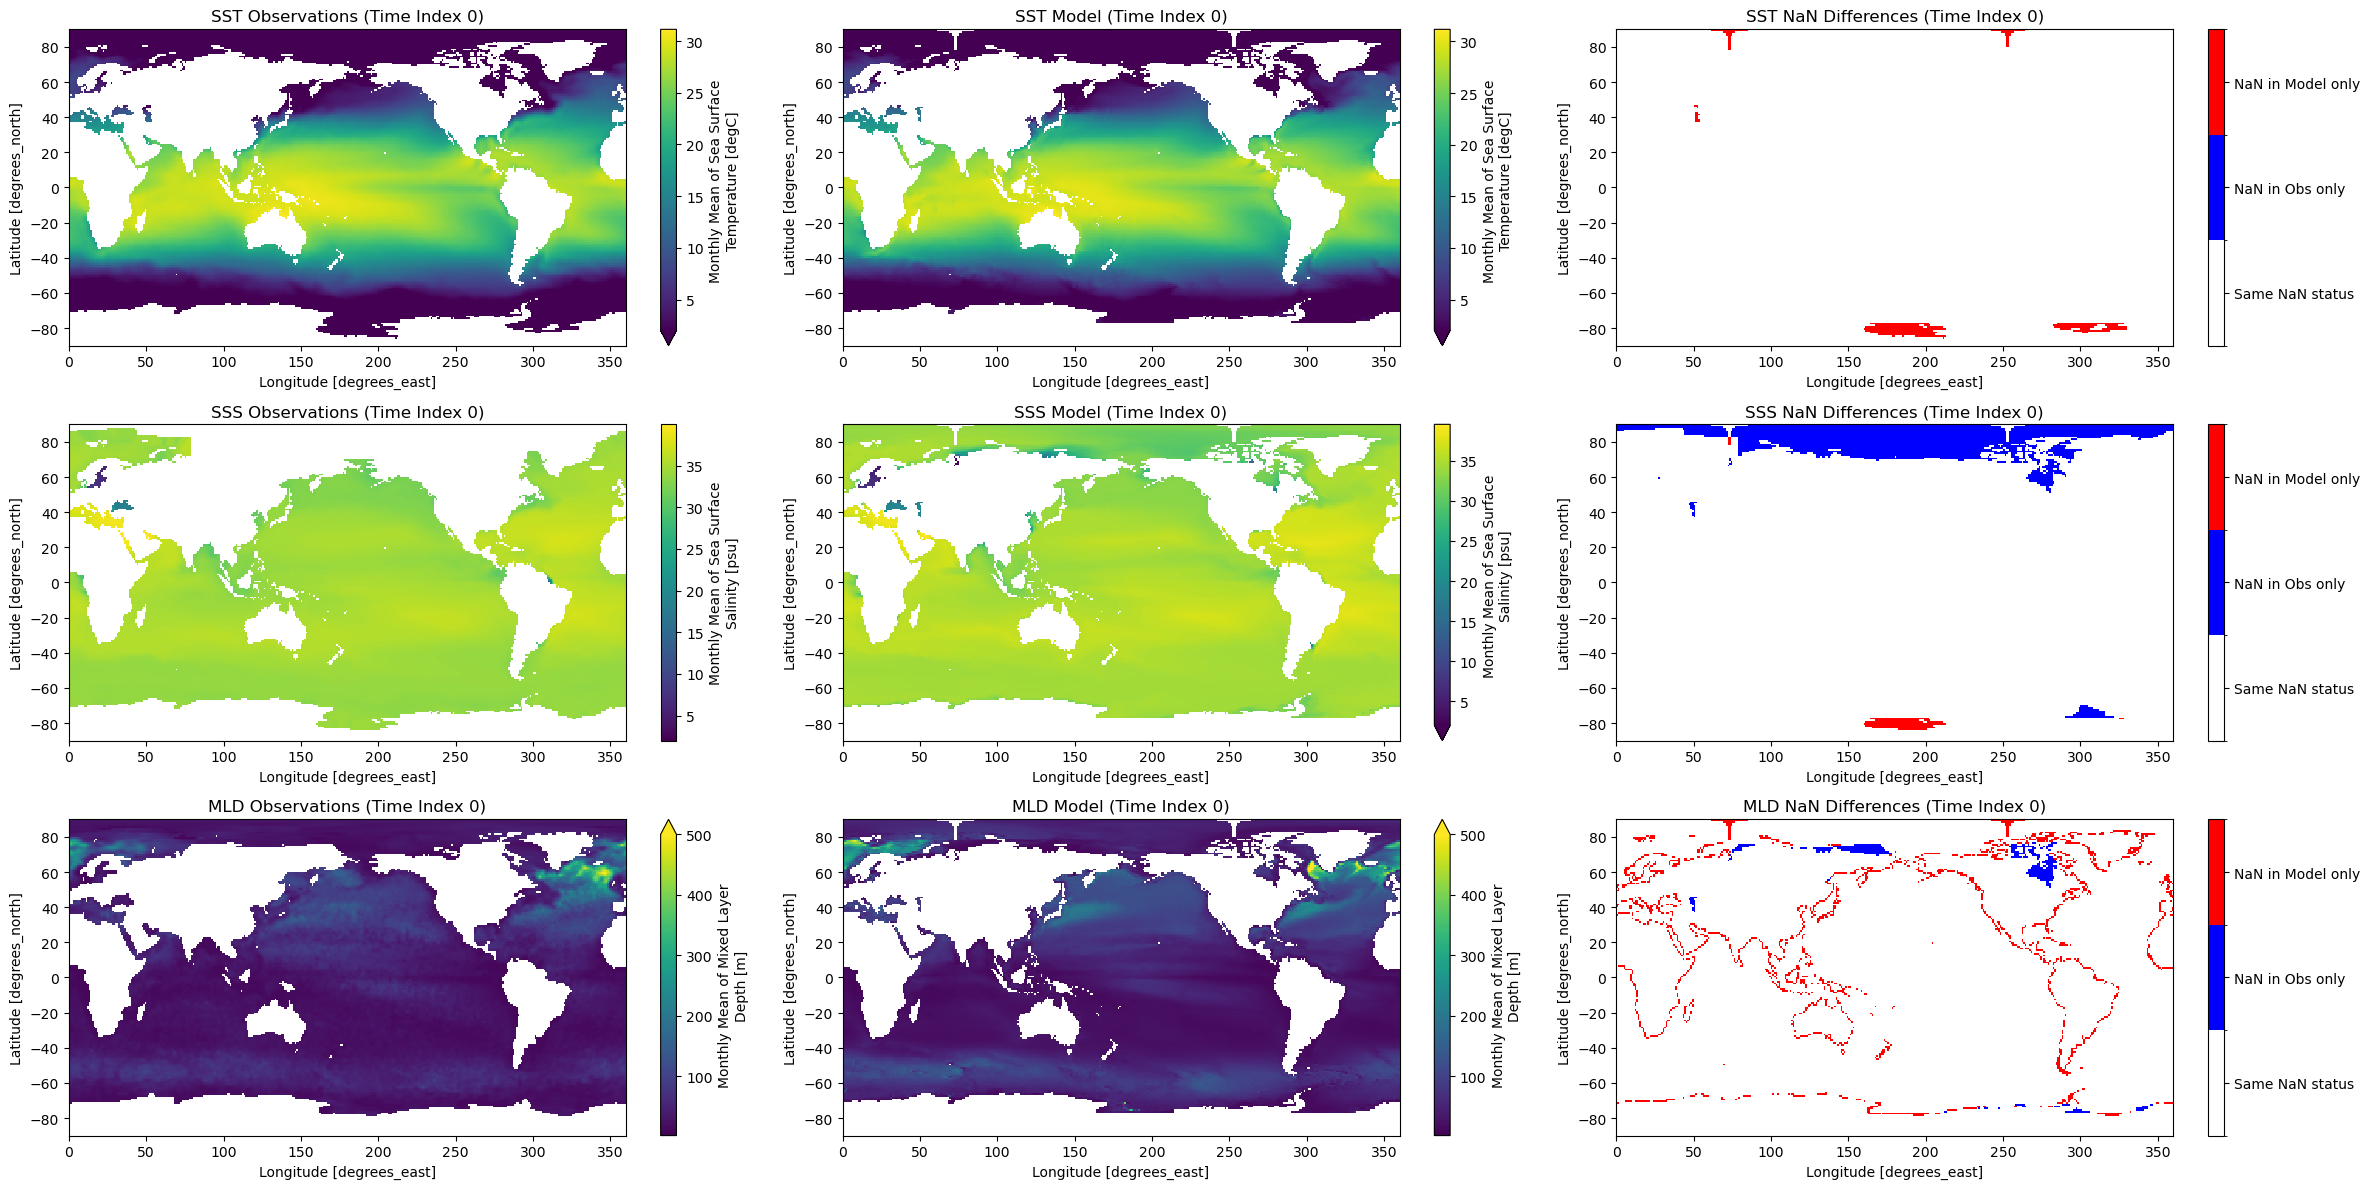

In [30]:
time_indices = [0]
variables = ['sst', 'sss', 'mld']

fig, axes = plt.subplots(nrows=len(variables), ncols=3, figsize=(24, 4 * len(variables)))

# Custom colormap and normalization for NaN mask differences
cmap = mcolors.ListedColormap(['white', 'blue', 'red'])
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

for row, var in enumerate(variables):
    for time_index in time_indices:
        # Extract slices
        obs_slice = obs_combined[var].isel(month=time_index)
        model_slice = model[var].isel(month=time_index)

        # Plot observations
        obs_slice.plot(ax=axes[row, 0], vmin=2, vmax=500 if var == 'mld' else None)
        axes[row, 0].set_title(f'{var.upper()} Observations (Time Index {time_index})')

        # Plot model
        model_slice.plot(ax=axes[row, 1], vmin=2, vmax=500 if var == 'mld' else None)
        axes[row, 1].set_title(f'{var.upper()} Model (Time Index {time_index})')

        # NaN masks and difference classification
        obs_nan = obs_slice.isnull()
        model_nan = model_slice.isnull()

        nan_diff = xr.full_like(obs_nan, 0, dtype=int)
        nan_diff = nan_diff.where(obs_nan == model_nan, 1)
        nan_diff = nan_diff.where(~((~obs_nan) & model_nan), 2)
        nan_diff = nan_diff.where(obs_nan == model_nan, nan_diff)

        # Plot NaN differences
        im = nan_diff.plot(ax=axes[row, 2], cmap=cmap, norm=norm, add_colorbar=False)
        cbar = plt.colorbar(im, ax=axes[row, 2], ticks=[0, 1, 2])
        cbar.ax.set_yticklabels([
            'Same NaN status',
            'NaN in Obs only',
            'NaN in Model only'
        ])
        axes[row, 2].set_title(f'{var.upper()} NaN Differences (Time Index {time_index})')

plt.tight_layout()


#### Saving

In [31]:
model.to_netcdf("../processed/model.nc")

#### Other files

In [33]:
from utils.data.general import normalize_model_file

cfgs = [
    '00', '01', '02', '04', '05', '06', '07', '08', '09', '10', '12', '14', '15', '16', '17'
]

mesh_path = '../model/orca05l75_domain_cfg_nemov5_10m.nc'
weights_path = '../weights/weights_bilinear_orca05.nc'

for i, xx in enumerate(cfgs):
    src_path = f'../model/nemo{xx}_1m_201001_202212_grid_T.nc'
    output_path = f'../processed/nemo{xx}.nc'
    normalize_model_file(src_path, mesh_path, output_path, weights_path)
    print(f'Normalized {src_path} to {output_path}')

Normalized ../model/nemo00_1m_201001_202212_grid_T.nc to ../processed/nemo00.nc
Normalized ../model/nemo01_1m_201001_202212_grid_T.nc to ../processed/nemo01.nc
Normalized ../model/nemo02_1m_201001_202212_grid_T.nc to ../processed/nemo02.nc
Normalized ../model/nemo04_1m_201001_202212_grid_T.nc to ../processed/nemo04.nc
Normalized ../model/nemo05_1m_201001_202212_grid_T.nc to ../processed/nemo05.nc
Normalized ../model/nemo06_1m_201001_202212_grid_T.nc to ../processed/nemo06.nc
Normalized ../model/nemo07_1m_201001_202212_grid_T.nc to ../processed/nemo07.nc
Normalized ../model/nemo08_1m_201001_202212_grid_T.nc to ../processed/nemo08.nc
Normalized ../model/nemo09_1m_201001_202212_grid_T.nc to ../processed/nemo09.nc
Normalized ../model/nemo10_1m_201001_202212_grid_T.nc to ../processed/nemo10.nc
Normalized ../model/nemo12_1m_201001_202212_grid_T.nc to ../processed/nemo12.nc
Normalized ../model/nemo14_1m_201001_202212_grid_T.nc to ../processed/nemo14.nc
Normalized ../model/nemo15_1m_201001_202